In [22]:
import numpy as np
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import random
import re, os
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter("ignore", UserWarning)
print(os.listdir("../input"))
% matplotlib inline

['train.csv', 'sample_submission.csv', 'test_labels.csv', 'test.csv']


In [23]:
text_all = pd.read_csv("../input/train.csv")

In [24]:
text_all.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


 # Texto sem Pré-processamento

In [25]:
text_all['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [35]:
def clean_str(string):
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)

    cleanr = re.compile('<.*?>')

    string = re.sub(r'\d+', '', string)
    string = re.sub(cleanr, '', string)
    string = re.sub("'", '', string)
    string = re.sub(r'\W+', ' ', string)
    string = string.replace('_', '')
    
    stop_words = set(stopwords.words('english'))
    word_list = text_to_word_sequence(string)
    no_stop_words = [w for w in word_list if not w in stop_words]
    no_stop_words = " ".join(no_stop_words)
    string = no_stop_words


    return string.strip().lower()

# Texto limpo

In [36]:
text_all['comment_text'] = text_all['comment_text'].apply(lambda x: clean_str(x))

In [37]:
text_all['comment_text'][0]

'explanation edits made username hardcore metallica fan reverted nt vandalisms closure gas voted new york dolls fac please nt remove template talk page since im retired'

In [38]:
text_all.columns
labels = text_all.columns[2:]

In [39]:
labels

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

# Nuvem de palavras para cada label

toxic


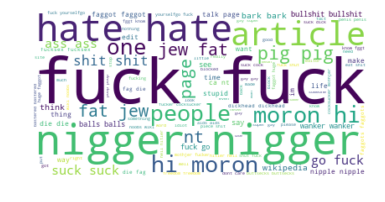

severe_toxic


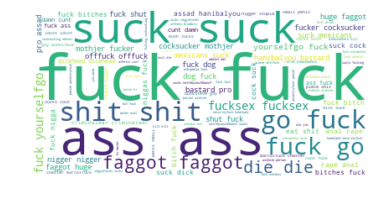

obscene


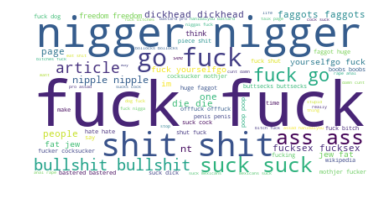

threat


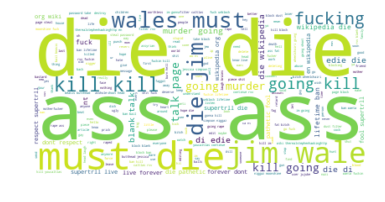

insult


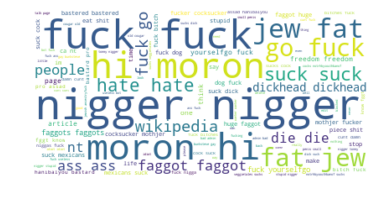

identity_hate


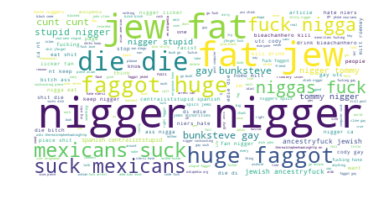

In [40]:

list_words = []
for label  in labels:
    text= ""
    for comment, li in zip(text_all['comment_text'], text_all[label]):
            if li == 1:
                text += " "+comment
    print(label)
    wordcloud = WordCloud(max_font_size=100, max_words=1000000, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()
    list_words.append(wordcloud.words_)
                


# Gráfico com as palavras que mais aparecem para cada Label

toxic


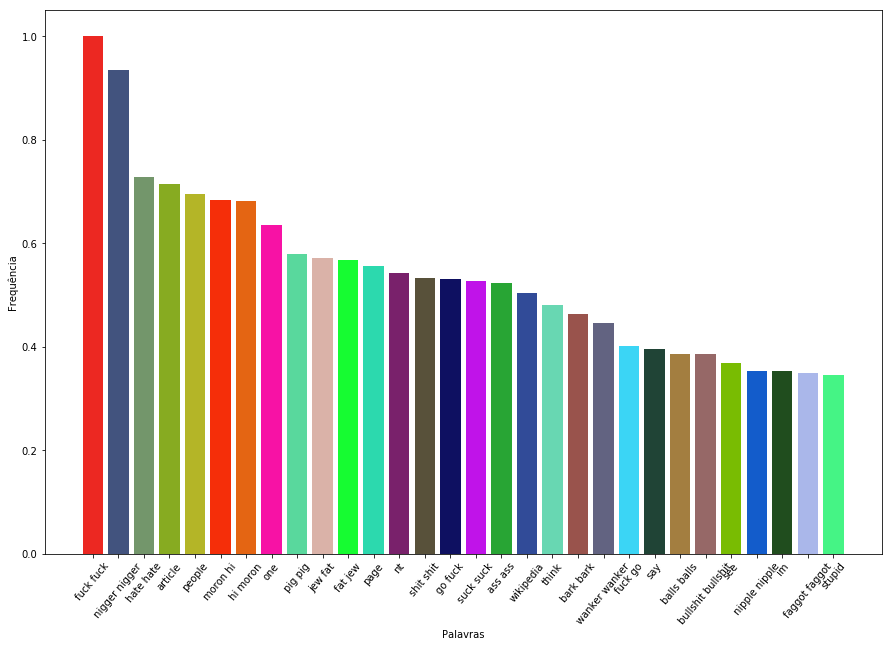

severe_toxic


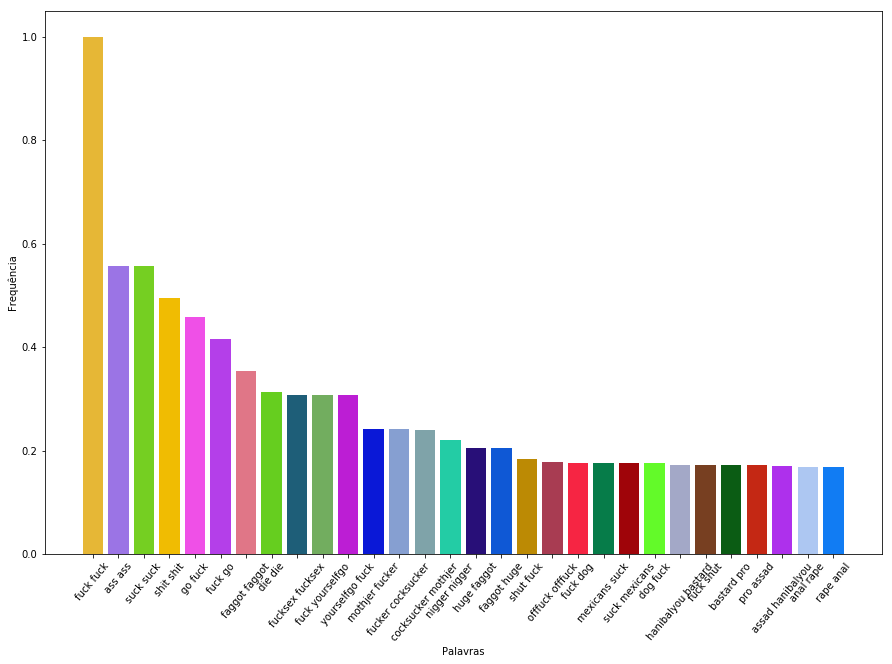

obscene


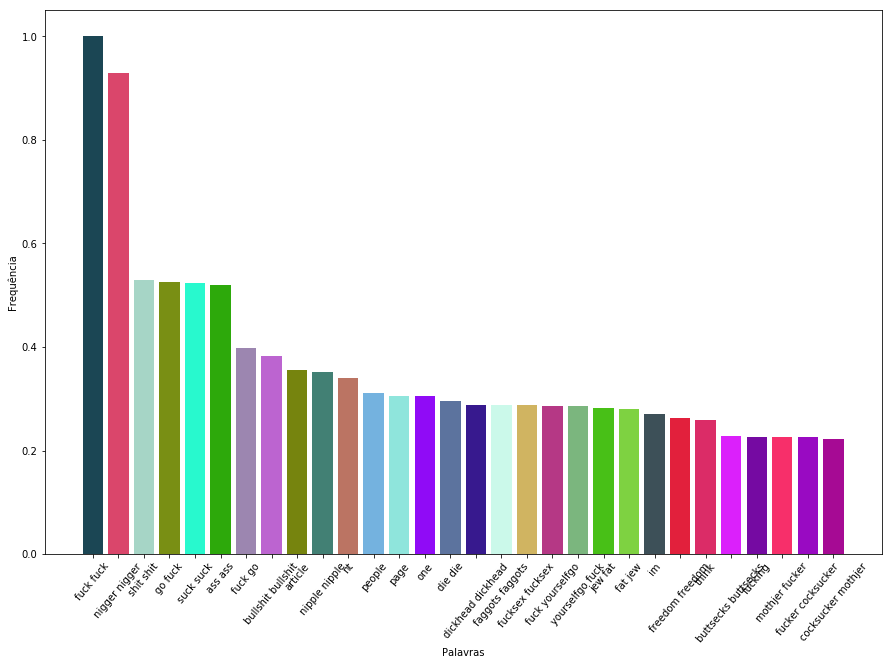

threat


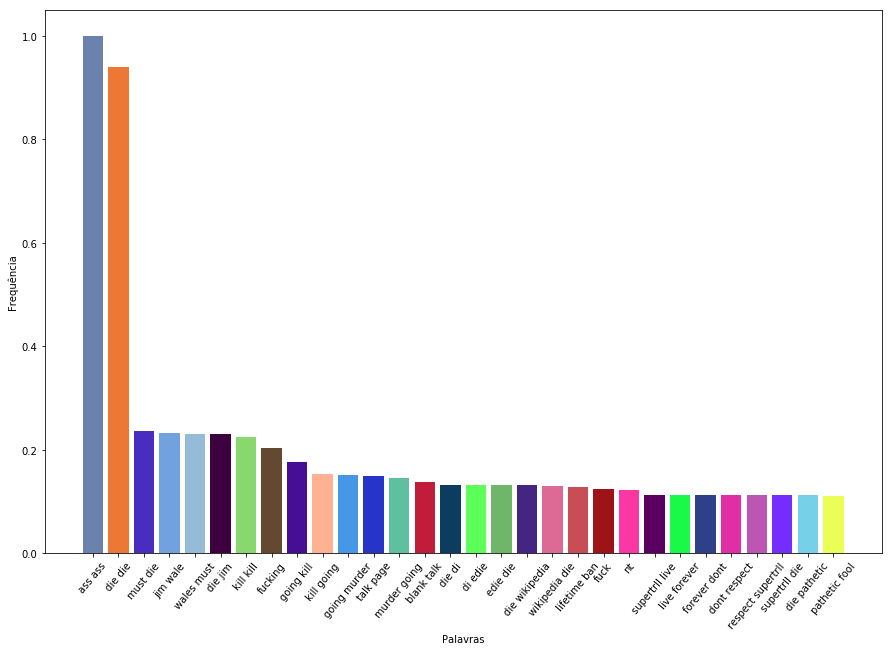

insult


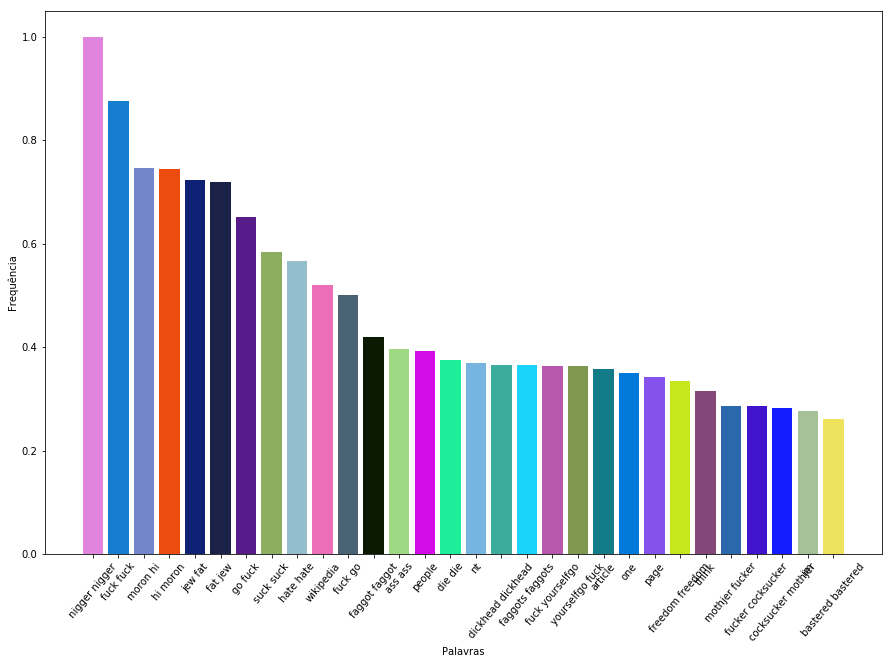

identity_hate


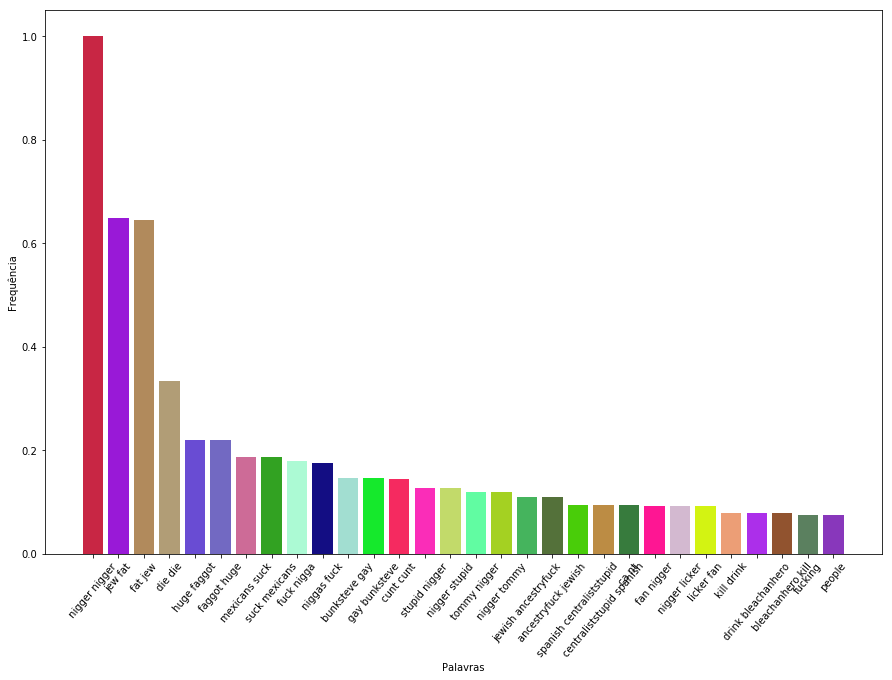

In [41]:
i = 0;
for label in labels:

    words = list(list_words[i].keys())
    frequencia = list(list_words[i].values())

    print(label)
    get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(30)))
    plt.figure(figsize=(15,10))
    plt.bar(words[:30], frequencia[:30], color=get_colors(30))

    plt.xticks(rotation=50)
    plt.xlabel("Palavras")
    plt.ylabel("Frequência")
    plt.show()
    i += 1